In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_pickle('Datos/Data_all_sessions_cleaned')
noise = data[data.bNoise == 1]
neuron = data[data.bNoise == 0]


In [5]:
data.columns

Index(['PatientExperiment', 'Channel', 'Cluster', 'Bulk', 'bNoise', 'Mean'], dtype='object')

In [7]:
print(len(noise))
print(len(neuron))

860
728


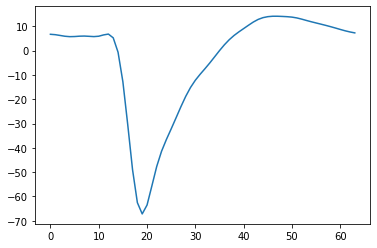

In [16]:
fig = plt.figure(1)
ax = fig.subplots(1)
x = neuron.Mean.iloc[10]
ax.plot(np.arange(len(x)),x)

Puede verse que el pico de cada spike se encuentra en el elemento 20 (i = 19)

In [18]:
data['Amplitude'] = data.Mean.apply(lambda row: row[19])

Text(0.5, 1.0, 'Amplitude')

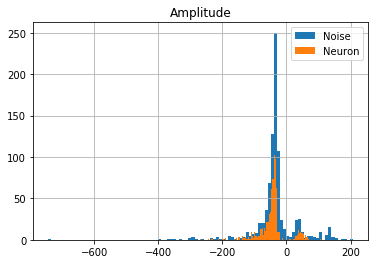

In [74]:
data.Amplitude[data.bNoise == 1].hist(bins = 100)
data.Amplitude[data.bNoise == 0].hist(bins = 100)
plt.legend(['Noise','Neuron'])
plt.title('Amplitude')

In [ ]:
data['SD'] = data.Bulk.apply(lambda row: np.std(row,axis = 0))

In [ ]:
A = data.SD.apply(lambda row: np.mean(row,axis =0 ))

Text(0.5, 1.0, 'Mean of Std')

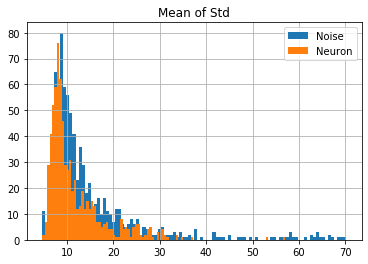

In [75]:
A[data.bNoise == 1].hist(bins = 100)
A[data.bNoise == 0].hist(bins = 100)
plt.legend(['Noise','Neuron'])
plt.title('Mean of Std')

Text(0.5, 1.0, 'derivative in the peak, i = 20')

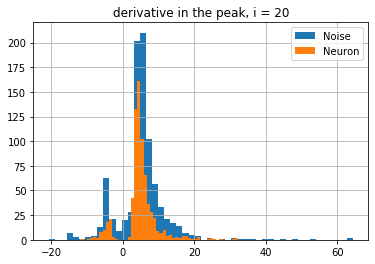

In [78]:
i = 20
data['derivative'] = data.Mean.apply(lambda row: np.gradient(row)[i])
data[data.bNoise == 1].derivative.hist(bins = 50)
data[data.bNoise == 0].derivative.hist(bins = 50)
plt.legend(['Noise','Neuron'])
plt.title('derivative in the peak, i = {}'.format(i))

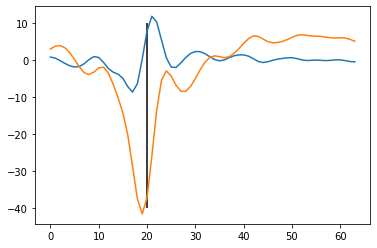